# Лабораторная работа №4: Частотный анализ формул численного интегрирования

Выполнили студенты гр. 2384 Тимченко Дмитрий Алексеевич и Цыганков Роман Максимович. Вариант №.19

## Цель работы

Провести анализ частотных характеристик известных формул численного интегрирования.

## Основные теоретические положения

# Формула прямоугольников (метод средних)
$y_{n+1} = y_n + s_{n+\frac{1}{2}}, \quad y_0 = 0$

Суть метода: Площадь криволинейной трапеции на отрезке $[t_n, t_{n+1}]$ аппроксимируется площадью прямоугольника с высотой, равной значению подынтегральной функции $s(t)$ в средней точке интервала ($s_{n+\frac{1}{2}}$).

Погрешность: Локальная погрешность имеет порядок $O(h^3)$, а глобальная (на всём интервале) — $O(h^2)$, где $h$ — шаг интегрирования.

# Формула трапеций
$y_{n+1} = y_n + \frac{1}{2} (s_{n} + s_{n+1}), \quad y_0 = 0$

Суть метода: Площадь на отрезке $[t_n, t_{n+1}]$ аппроксимируется площадью прямой трапеции, основанием которой служат значения функции на концах отрезка ($s_n$ и $s_{n+1}$).

Погрешность: Локальная погрешность порядка $O(h^3)$, глобальная — $O(h^2)$.


# Формула Симпсона (параболическая формула)
$y_{n+1} = y_{n-1} + \frac{1}{3} (s_{n-1} + 4s_{n} + s_{n+1}), \quad y_0 = 0$

Суть метода: Функция $s(t)$ на отрезке $[t_{n-1}, t_{n+1}]$ аппроксимируется параболой, проходящей через три точки: $s_{n-1}, s_n, s_{n+1}$. Для старта метода требуется два начальных значения.

Погрешность: Локальная погрешность порядка $O(h^5)$, глобальная — $O(h^4)$.


# Формула для интегрирования по «правилу 3/8»
$y_{n+2} = y_{n-1} + \frac{1}{8} (s_{n-1} + 3 s_{n} + 3 s_{n+1} + s_{n+2})$

Суть метода: Функция $s(t)$ на отрезке $[t_{n-1}, t_{n+2}]$ (длиной в 3 шага $h$) аппроксимируется кубическим полиномом. Это частный случай формулы Ньютона-Котеса 4-го порядка.

Погрешность: Локальная погрешность порядка $O(h^5)$, глобальная — $O(h^4)$, аналогично формуле Симпсона.


# Оценка точности методов
Для оценки точности численного интегрирования вводится отношение вычисленного значения к точному:

$\gamma = \frac{\text{Вычисленное}}{\text{Точное}}$

Идеальный метод даёт $\gamma = 1$. Отклонение от единицы характеризует погрешность метода.

# Анализ в частотной области
При анализе цифровых систем, включающих интеграторы, используется понятие передаточной функции $H(w)$.

Связь передаточной функции для круговой частоты и циклической:
$H(w) = H(2 \pi f) = \tilde H(f)$

$H(w)$ — передаточная функция как функция круговой частоты $w$ [рад/с].

$\tilde H(f)$ — та же передаточная функция, но как функция циклической частоты $f$ [Гц].

Связь: $w = 2 \pi f$. Это соотношение позволяет переходить от одной формы представления частоты к другой, что удобно при сопоставлении теоретических расчётов с результатами экспериментов, где частота обычно измеряется в Герцах.



## Постановка задачи

Получить формулы для передаточных функций рекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для различных квадратурных формул и построить графики $\tilde H(f)$. Проинтерпретировать частотные свойства передаточных функций. Получить формулы для передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам Ньютона-Котеса различного порядка. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных квадратурных формул.

## Выполнение работы

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import cmath as cm
import math as m

F = np.arange(0.0001, 0.5, 0.0001)
W = [2 * m.pi * f for f in F]

## 1.Вывести формулы передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций и Симпсона. Построить графики передаточных функций и графики отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства полученных передаточных функций.

Для анализа точности и свойств методов интегрирования применяется частотный подход, при котором в качестве тестового сигнала используется комплексная экспонента $s_n = e^{i \omega n}$. Предполагается, что выходной сигнал интегратора имеет вид $y_n = H(\omega) e^{i \omega n}$, где $H(\omega)$ — комплексная передаточная функция (частотная характеристика) интегратора.

Точное значение интеграла от тестового сигнала $e^{i \omega t}$ равно $\frac{e^{i \omega t}}{i \omega}$. Мерой точности метода служит отношение $\gamma$ вычисленного значения к точному:

$$
\gamma(\omega) = \frac{H(\omega)}{1/(i \omega)} = i \omega H(\omega)
$$

Идеальный интегратор имеет $\gamma(\omega) = 1$.

## 1. Квадратурная формула прямоугольников (метод средних)

**Разностное уравнение:**
$$
y_{n+1} = y_n + s_{n+\frac{1}{2}}, \quad y_0 = 0
$$

**Вывод передаточной функции:**

1. Подставляем $s_n = e^{i \omega n}$, $y_n = H(\omega) e^{i \omega n}$:
   $$
   H(\omega) e^{i \omega (n+1)} = H(\omega) e^{i \omega n} + e^{i \omega (n + \frac{1}{2})}
   $$

2. Сокращаем общий множитель $e^{i \omega n}$:
   $$
   H(\omega) e^{i \omega} = H(\omega) + e^{i \omega / 2}
   $$

3. Группируем члены с $H(\omega)$:
   $$
   H(\omega) (e^{i \omega} - 1) = e^{i \omega / 2}
   $$

4. Выражаем $H(\omega)$:
   $$
   H(\omega) = \frac{e^{i \omega / 2}}{e^{i \omega} - 1}
   $$

5. Умножаем числитель и знаменатель на $e^{-i \omega / 2}$:
   $$
   H(\omega) = \frac{1}{e^{i \omega / 2} - e^{-i \omega / 2}} = \frac{1}{2i \sin(\omega / 2)}
   $$

**Отношение вычисленного значения к точному:**
$$
\gamma_{\text{пр}} = i \omega H(\omega) = i \omega \cdot \frac{1}{2i \sin(\omega / 2)} = \frac{\omega / 2}{\sin(\omega / 2)}
$$

## 2. Квадратурная формула трапеций

**Разностное уравнение:**
$$
y_{n+1} = y_n + \frac{1}{2} (s_n + s_{n+1}), \quad y_0 = 0
$$

**Вывод передаточной функции:**

1. Подставляем $s_n = e^{i \omega n}$, $y_n = H(\omega) e^{i \omega n}$:
   $$
   H(\omega) e^{i \omega (n+1)} = H(\omega) e^{i \omega n} + \frac{1}{2} (e^{i \omega n} + e^{i \omega (n+1)})
   $$

2. Сокращаем общий множитель $e^{i \omega n}$:
   $$
   H(\omega) e^{i \omega} = H(\omega) + \frac{1}{2} (1 + e^{i \omega})
   $$

3. Группируем члены с $H(\omega)$:
   $$
   H(\omega) (e^{i \omega} - 1) = \frac{1}{2} (1 + e^{i \omega})
   $$

4. Выражаем $H(\omega)$:
   $$
   H(\omega) = \frac{1 + e^{i \omega}}{2 (e^{i \omega} - 1)}
   $$

5. Умножаем числитель и знаменатель на $e^{-i \omega / 2}$:
   $$
   H(\omega) = \frac{e^{i \omega / 2} + e^{-i \omega / 2}}{2 (e^{i \omega / 2} - e^{-i \omega / 2})} = \frac{2 \cos(\omega / 2)}{2 \cdot 2i \sin(\omega / 2)} = \frac{\cos(\omega / 2)}{2i \sin(\omega / 2)}
   $$

**Отношение вычисленного значения к точному:**
$$
\gamma_{\text{тр}} = i \omega H(\omega) = i \omega \cdot \frac{\cos(\omega / 2)}{2i \sin(\omega / 2)} = \frac{\omega}{2} \cdot \frac{\cos(\omega / 2)}{\sin(\omega / 2)}
$$

## 3. Квадратурная формула Симпсона

**Разностное уравнение:**
$$
y_{n+1} = y_{n-1} + \frac{1}{3} (s_{n-1} + 4s_n + s_{n+1}), \quad y_0 = 0
$$

**Вывод передаточной функции:**

1. Подставляем $s_n = e^{i \omega n}$, $y_n = H(\omega) e^{i \omega n}$:
   $$
   H(\omega) e^{i \omega (n+1)} = H(\omega) e^{i \omega (n-1)} + \frac{1}{3} (e^{i \omega (n-1)} + 4e^{i \omega n} + e^{i \omega (n+1)})
   $$

2. Сокращаем общий множитель $e^{i \omega n}$:
   $$
   H(\omega) e^{i \omega} = H(\omega) e^{-i \omega} + \frac{1}{3} (e^{-i \omega} + 4 + e^{i \omega})
   $$

3. Группируем члены с $H(\omega)$:
   $$
   H(\omega) (e^{i \omega} - e^{-i \omega}) = \frac{1}{3} (e^{-i \omega} + 4 + e^{i \omega})
   $$

4. Выражаем $H(\omega)$, используя тождества Эйлера ($e^{i\omega} + e^{-i\omega} = 2\cos\omega$, $e^{i\omega} - e^{-i\omega} = 2i\sin\omega$):
   $$
   H(\omega) = \frac{4 + 2 \cos \omega}{3 \cdot 2i \sin \omega} = \frac{2 + \cos \omega}{3i \sin \omega}
   $$

**Отношение вычисленного значения к точному:**
$$\gamma_{\text{симп}} = i \omega H(\omega) = i \omega \cdot \frac{2 + \cos \omega}{3i \sin \omega} = \frac{\omega (2 + \cos \omega)}{3 \sin \omega}$$

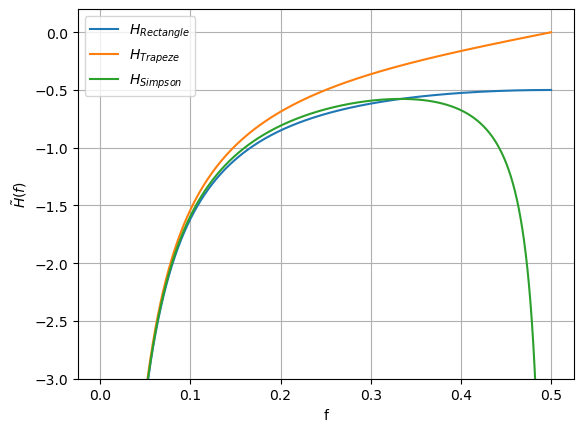

In [44]:
HRectangle = [1 / (2 * 1j * np.sin(0.5 * w)) for w in W]
HTrapeze = [np.cos(0.5 * w) / (2 * 1j * np.sin(0.5 * w)) for w in W]
HSimpson = [(2 + np.cos(w)) / (3 * 1j * np.sin(w)) for w in W]
plt.figure()
plt.plot(F, [h.imag for h in HRectangle], label='$H_{Rectangle}$')
plt.plot(F, [h.imag for h in HTrapeze], label='$H_{Trapeze}$')
plt.plot(F, [h.imag for h in HSimpson], label='$H_{Simpson}$')
plt.xlabel('f')
plt.ylabel('$\\tilde H(f)$')
plt.ylim((-3, 0.2))
plt.legend()
plt.grid()
plt.show()

Графики передаточных функций демонстрируют общую для всех трёх методов тенденцию: усиление сигналов в области низких частот.
По мере роста частоты начинается ослабление сигнала, причём степень этого ослабления существенно различается между методами:
* Метод прямоугольников демонстрирует наиболее выраженное ослабление сигнала уже в области средних частот.

* Метод трапеций обеспечивает более плавный и менее интенсивный спад амплитуды.

* Метод Симпсона сохраняет амплитуду сигнала в среднем частотном диапазоне наиболее эффективно.

В области высоких частот все методы проявляют свойства сильного подавления сигнала. Наиболее резкий и выраженный спад амплитуды наблюдается у фильтра, реализованного по формуле Симпсона.

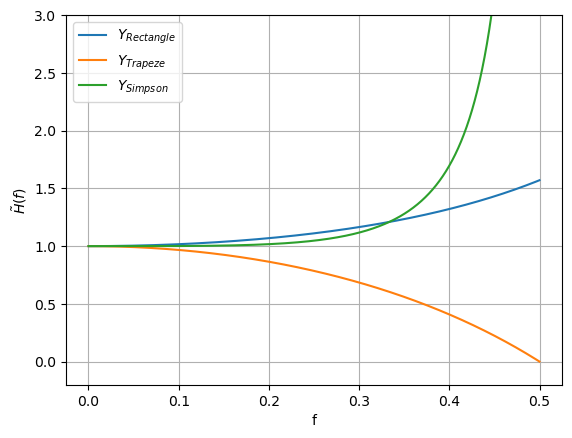

In [50]:
YRectangle = [(0.5 * w) / m.sin(0.5 * w) for w in W]
YTrapeze = [(m.cos(0.5 * w) * 0.5 * w) / m.sin(0.5 * w) for w in W]
YSimpson = [((m.cos(w) + 2) * w) / (3 * m.sin(w)) for w in W]

plt.figure()
plt.plot(F, YRectangle, label='$Y_{Rectangle}$')
plt.plot(F, YTrapeze, label='$Y_{Trapeze}$')
plt.plot(F, YSimpson, label='$Y_{Simpson}$')
plt.xlabel('f')
plt.ylabel('$\\tilde H(f)$')
plt.ylim((-0.2, 3))
plt.legend()
plt.grid()
plt.show()

## Вывести формулу передаточной функции рекурсивного фильтра для интегрирования по «правилу 3/8»:

$$y_{n+2} = y_{n-1} + 1/8 * (x_{n+2} + 3x_{n+1} + 3x_n + x_{n-1})$$

Построить график передаточной функции и график отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства передаточной функции.

## Задано разностное уравнение, описывающее рекурсивный метод интегрирования, аналогичный правилу 3/8 Симпсона:

$y_{n+2} = y_{n-1} + \frac{1}{8} (x_{n+2} + 3 x_{n+1} + 3 x_n + x_{n-1})$,

где:

$x_n$ — входной сигнал,

$y_n$ — результат интегрирования (накопленная площадь).

## 1. Нахождение передаточной функции $H(w)$

Для нахождения комплексной передаточной функции $H(w)$ подставим в уравнение гармонические пробные сигналы:

$x_n = e^{i \omega n}$

$y_n = H(\omega) e^{i \omega n}$

Здесь $\omega$ — нормированная частота.

Подстановка в разностное уравнение дает:
$H(\omega) e^{i \omega (n+2)} = H(\omega) e^{i \omega (n-1)} + \frac{1}{8} \left( e^{i \omega (n+2)} + 3 e^{i \omega (n+1)} + 3 e^{i \omega n} + e^{i \omega (n-1)} \right)$

Разделим обе части уравнения на $e^{i \omega n}$ (общий множитель):
$H(\omega) e^{2i \omega} = H(\omega) e^{-i \omega} + \frac{1}{8} \left( e^{2i \omega} + 3 e^{i \omega} + 3 + e^{-i \omega} \right)$

Перенесем все слагаемые с $H(\omega)$ в левую часть:
$H(\omega) \left( e^{2i \omega} - e^{-i \omega} \right) = \frac{1}{8} \left( e^{2i \omega} + 3 e^{i \omega} + 3 + e^{-i \omega} \right)$

Выразим передаточную функцию:
$H(\omega) = \frac{ e^{2i \omega} + 3 e^{i \omega} + 3 + e^{-i \omega} }{ 8 \left( e^{2i \omega} - e^{-i \omega} \right) }$

## 2. Упрощение выражения

Умножим числитель и знаменатель на $e^{-0.5i \omega}$, чтобы симметризовать степени экспонент:
$H(\omega) = \frac{ e^{1.5i \omega} + 3 e^{0.5i \omega} + 3 e^{-0.5i \omega} + e^{-1.5i \omega} }{ 8 \left( e^{1.5i \omega} - e^{-1.5i \omega} \right) }$

В числителе и знаменателе получились комбинации, которые легко сводятся к тригонометрическим функциям:

Числитель: $ (e^{1.5i \omega} + e^{-1.5i \omega}) + 3(e^{0.5i \omega} + e^{-0.5i \omega}) = 2 \cos(1.5\omega) + 6 \cos(0.5\omega)$

Знаменатель: $ 8 \cdot 2i \sin(1.5\omega) = 16i \sin(1.5\omega)$

Таким образом, передаточная функция принимает вид:
$H(\omega) = \frac{ 2 \cos(1.5\omega) + 6 \cos(0.5\omega) }{ 16i \sin(1.5\omega) } = \frac{ \cos(1.5\omega) + 3 \cos(0.5\omega) }{ 8i \sin(1.5\omega) }$

## 3. Сравнение с идеальным интегратором

Передаточная функция идеального интегратора для сигнала $e^{i \omega t}$ равна $\frac{1}{i \omega}$.

Чтобы оценить точность численного метода, найдем отношение передаточной функции нашего фильтра $H(\omega)$ к передаточной функции идеального интегратора:

$\gamma(\omega) = \frac{H(\omega)}{1/(i \omega)} = H(\omega) \cdot i \omega$

Подставим выражение для $H(\omega)$:
$\gamma(\omega) = \frac{ \cos(1.5\omega) + 3 \cos(0.5\omega) }{ 8i \sin(1.5\omega) } \cdot i \omega = \frac{ \omega \left( \cos(1.5\omega) + 3 \cos(0.5\omega) \right) }{ 8 \sin(1.5\omega) }$

Это отношение $\gamma(\omega)$ показывает, насколько точно данный рекурсивный фильтр аппроксимирует операцию интегрирования на разных частотах. При $\gamma(\omega) \approx 1$ метод работает точно.

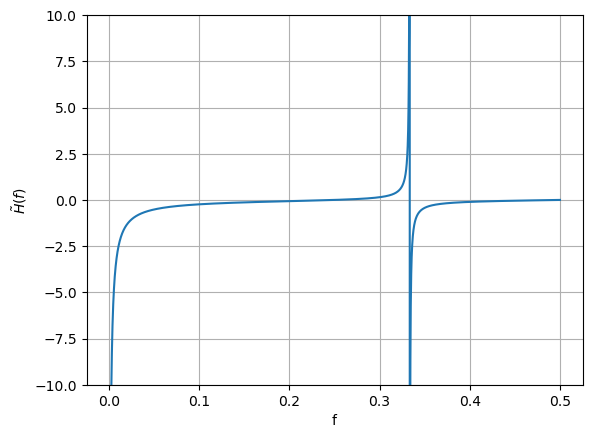

In [62]:
H3_8 = [(m.cos(1.5 * w) + m.cos(0.5 * w)) / (8 * 1j * m.sin(1.5 * w)) for w in W]

plt.figure()
plt.plot(F, [h.imag for h in H3_8])
plt.xlabel('f')
plt.ylabel('$\\tilde H(f)$')
plt.ylim((-10, 10))
plt.grid()
plt.show()

Амплитудно-частотная характеристика (АЧХ) рекурсивного фильтра, реализующего интегрирование по "правилу 3/8", имеет особенности (резонансы) на частотах 0 и примерно 0.33 от частоты Найквиста. Вблизи этих частот наблюдается значительное усиление сигнала, в то время как на самих частотах возникает сингулярность (асимптота), приводящая к сильному искажению. На остальном частотном диапазоне фильтр оказывает подавляющее действие на сигнал.

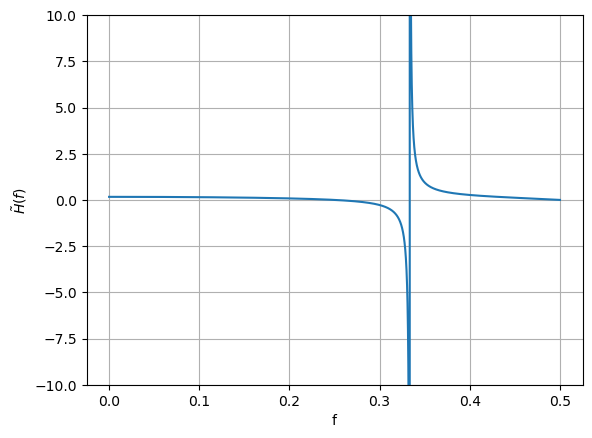

In [65]:
Y3_8 = [((m.cos(1.5 * w) + m.cos(0.5 * w)) * w) / (8 * m.sin(1.5 * w)) for w in W]

plt.figure()
plt.plot(F, Y3_8)
plt.xlabel('f')
plt.ylabel('$\\tilde H(f)$')
plt.ylim((-10, 10))
plt.grid()
plt.show()

## 3.Провести сопоставительный анализ частотных характеристик передаточных функций, полученных при выполнении п. 1 и 2.

## Поведение рассмотренных фильтров интегрирования в низкочастотной области (вблизи нуля) является схожим и характеризуется значительным искажением сигнала. Однако на высоких частотах наблюдаются существенные различия:

* Фильтр Симпсона: демонстрирует резкий спад амплитуды в окрестности частоты 0.5.

* Фильтр прямоугольников: обеспечивает умеренное подавление сигнала.

* Фильтр трапеций: полностью подавляет сигнал.

* Фильтр по «правилу 3/8»: коэффициент передачи плавно стремится к нулю.

При этом фильтр на основе «правила 3/8» имеет уникальную особенность — дополнительную сингулярность (асимптоту) на частоте ~0.33, которая также является источником сильных искажений.

## Выводы
В ходе лабораторной работы были получены передаточные функции рекурсивных фильтров, соответствующих квадратурным формулам (прямоугольников, трапеций, Симпсона) и «правилу 3/8». По этим функциям построены их АЧХ и графики относительной погрешности интегрирования. Завершающим этапом стал сравнительный анализ частотных характеристик всех исследуемых фильтров, выявивший их ключевые особенности и отличия.